<a href="https://colab.research.google.com/github/yoonji811/ECGProject/blob/master/ECG_Gender_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
diag = pd.read_excel("/content/drive/My Drive/Colab Notebooks/세종병원/Diagnostics_balanced5000.xlsx",index_col=0)
diag

,FileName,Rhythm,Beat,PatientAge,DateofBirth,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
1,MUSE_20180112_073319_29000,SB,TWC,59,01-01-1958,FEMALE,52,52,92,432,401,76,42,8,215,261,431
14,MUSE_20180115_133559_70000,SB,NONE,54,01-01-1962,FEMALE,59,59,82,416,411,12,28,9,218,259,426
15,MUSE_20180113_133901_16000,AFIB,STTC,67,01-01-1949,FEMALE,72,65,90,416,455,-1,-15,12,228,273,436
16,MUSE_20180113_071734_35000,SB,NONE,51,01-01-1965,FEMALE,56,56,88,418,403,52,45,10,212,256,421
17,MUSE_20180114_121218_64000,SB,RBBB,61,01-01-1955,MALE,58,58,132,440,431,38,39,10,224,290,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10638,MUSE_20181222_204249_88000,SVT,NONE,69,04-21-1948,MALE,178,170,122,308,530,57,225,29,203,264,357
10639,MUSE_20181222_204302_49000,SVT,NONE,36,03-06-1981,MALE,220,220,110,224,428,-77,79,36,212,267,324
10641,MUSE_20181222_204306_99000,SVT,NONE,80,06-03-1937,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,10-21-1936,FEMALE,162,81,162,294,482,110,-75,27,173,254,320


In [0]:
diag.Gender.value_counts()

MALE      2500
FEMALE    2500
Name: Gender, dtype: int64

In [0]:
ECG = np.load("/content/drive/My Drive/Colab Notebooks/세종병원/ECG5_bal_reshape.npy")

In [0]:
print(ECG.shape)

(5000, 12, 5000, 1)


# Gender Classification
---
---

In [0]:
label_gender = diag.Gender

In [0]:
label_gender

1        FEMALE
14       FEMALE
15       FEMALE
16       FEMALE
17         MALE
          ...  
10638      MALE
10639      MALE
10641    FEMALE
10642    FEMALE
10645      MALE
Name: Gender, Length: 5000, dtype: object

In [0]:
label_gender = label_gender.apply(lambda x: 1 if x=='MALE' else 0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(ECG, label_gender, test_size=0.2, shuffle=True, stratify=label_gender, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, stratify=y_train, random_state=42)

In [0]:
print('train_male =', sum(y_train))
print('train_female =', len(y_train)-sum(y_train))
print('val_male =', sum(y_val))
print('val_female =', len(y_val)-sum(y_val))
print('test_male =', sum(y_test))
print('test_female =', len(y_test)-sum(y_test))

train_male = 1500
train_female = 1500
val_male = 500
val_female = 500
test_male = 500
test_female = 500


In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,2)  
y_val = to_categorical(y_val,2)  
y_test = to_categorical(y_test,2)

Using TensorFlow backend.


In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3000, 12, 5000, 1)
(1000, 12, 5000, 1)
(1000, 12, 5000, 1)
(3000, 2)
(1000, 2)
(1000, 2)


# Build Model & Train



In [0]:
model = Sequential()

model.add(ZeroPadding2D(padding=(0,2560),
                        input_shape=(12,5000,1))) #########

model.add(Conv2D(filters=16,
                kernel_size=(1,7)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

model.add(Conv2D(filters=16,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,4)))

model.add(Conv2D(filters=32,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

model.add(Conv2D(filters=32,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,4)))

model.add(Conv2D(filters=64,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [0]:
model.add(Conv2D(filters=128,
                kernel_size=(12,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,2)))

In [0]:
model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) ########

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) #######

model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 12, 10120, 1)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 10114, 16)     128       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 10114, 16)     64        
_________________________________________________________________
activation (Activation)      (None, 12, 10114, 16)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 5057, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 5053, 16)      1296      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 5053, 16)      6

In [0]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])

In [0]:
early_stop = EarlyStopping(patience = 5)
check_point = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/세종병원/best_gender.h5', save_best_only=True)

epochs = 50
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stop, check_point], validation_data=(X_val, y_val)) ########

Epoch 1/50
47/47 [==============================] - 8s 160ms/step - loss: 0.9494 - accuracy: 0.5053 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/50
47/47 [==============================] - 6s 131ms/step - loss: 0.8670 - accuracy: 0.5483 - val_loss: 0.6864 - val_accuracy: 0.5410
Epoch 3/50
47/47 [==============================] - 6s 132ms/step - loss: 0.8139 - accuracy: 0.5750 - val_loss: 0.6631 - val_accuracy: 0.6130
Epoch 4/50
47/47 [==============================] - 6s 131ms/step - loss: 0.7578 - accuracy: 0.6097 - val_loss: 0.6481 - val_accuracy: 0.6300
Epoch 5/50
47/47 [==============================] - 6s 132ms/step - loss: 0.7246 - accuracy: 0.6257 - val_loss: 0.6340 - val_accuracy: 0.6400
Epoch 6/50
47/47 [==============================] - 6s 132ms/step - loss: 0.7065 - accuracy: 0.6380 - val_loss: 0.6231 - val_accuracy: 0.6540
Epoch 7/50
47/47 [==============================] - 6s 130ms/step - loss: 0.7008 - accuracy: 0.6453 - val_loss: 0.6124 - val_accuracy: 0.6680
Epoch 

In [0]:
train_acc = model.evaluate(X_train,y_train)
val_acc = model.evaluate(X_val,y_val)

print('Train Acc:',train_acc)
print('Test Acc:',val_acc)

32/32 [==============================] - 1s 17ms/step - loss: 0.5541 - accuracy: 0.7310
Train Acc: [0.18020989000797272, 0.9626666903495789]
Test Acc: [0.554148256778717, 0.7310000061988831]


In [0]:
print('Average Train Acc:', np.mean(history.history['accuracy']))
print('Average val Acc:', np.mean(history.history['val_accuracy']))

Average Train Acc: 0.7257733345031738
Average val Acc: 0.6785999965667725


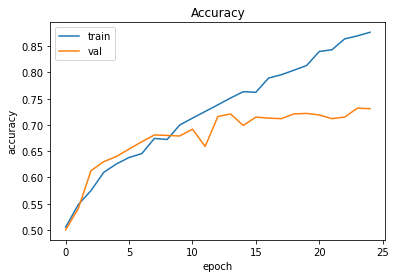

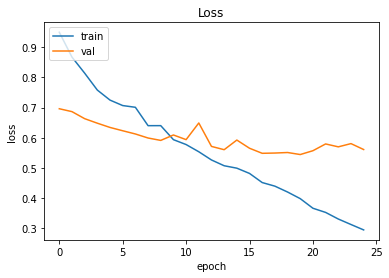

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')
plt.show()

# ROC Curve of Validation Set

In [0]:
val_pred = model.predict(X_val)

In [0]:
val_pred_prob = np.max(val_pred, axis=-1)
val_pred_cat = np.argmax(val_pred, axis=-1)

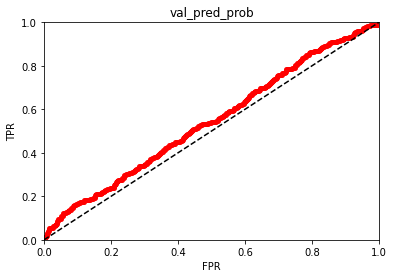

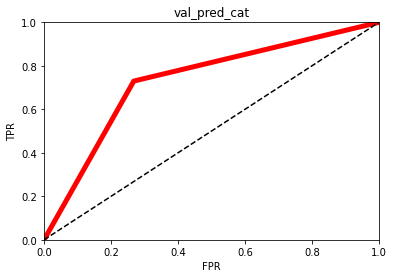

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,'r-',linewidth=5, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel("FPR")
  plt.ylabel("TPR")

fpr, tpr, _  = roc_curve(y_val[:,1],val_pred_prob)
plot_roc_curve(fpr,tpr)
plt.title('val_pred_prob')
plt.show()

fpr, tpr, _  = roc_curve(y_val[:,1],val_pred_cat)
plot_roc_curve(fpr,tpr)
plt.title('val_pred_cat')
plt.show()

In [0]:
print('AUC of val_pred_prob =', roc_auc_score(y_val[:,1], val_pred_prob))
print('AUC of val_pred_cat =', roc_auc_score(y_val[:,1], val_pred_cat))

AUC of val_pred_prob = 0.54452
AUC of val_pred_cat = 0.731


# ROC Curve of Test Set

In [0]:
y_pred = model.predict(X_test)

In [0]:
test_pred_prob = np.max(y_pred,axis=-1)
test_pred_cat = np.argmax(y_pred, axis=-1)

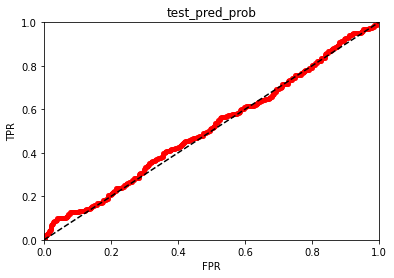

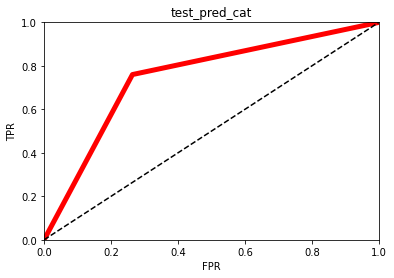

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,'r-',linewidth=5, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel("FPR")
  plt.ylabel("TPR")

fpr, tpr, _  = roc_curve(y_test[:,1],test_pred_prob)
plot_roc_curve(fpr,tpr)
plt.title('test_pred_prob')
plt.show()

fpr, tpr, _  = roc_curve(y_test[:,1],test_pred_cat)
plot_roc_curve(fpr,tpr)
plt.title('test_pred_cat')
plt.show()

In [0]:
print('AUC of test_pred_prob =', roc_auc_score(y_test[:,1], test_pred_prob))
print('AUC of test_pred_cat =', roc_auc_score(y_test[:,1], test_pred_cat))

AUC of test_pred_prob = 0.5138560000000001
AUC of test_pred_cat = 0.748


In [0]:
tpr

array([0.  , 0.76, 1.  ])

In [0]:
fpr

array([0.   , 0.264, 1.   ])